In [123]:
import pandas as pd
import altair as alt

In [124]:
df = pd.read_csv("PCA_results/pca_stats.csv")

In [125]:
df.columns = [i[:-7] for i in df.columns]

In [126]:
df = df.melt(value_vars=df.columns, value_name="variance", var_name="type")

In [127]:
bars = alt.Chart(df, width=600, height=300).mark_bar().encode(
    x='type',
    y='mean(variance)'
)

In [128]:
errors = alt.Chart(df, width=600, height=300).mark_rule(color='gray', strokeWidth=2).encode(
    x='type',
    y=alt.Y('ci0(variance):Q', title='percentage of variance explained'),
    y2='ci1(variance):Q'
)

In [129]:
x = alt.layer(bars, errors).configure_axisX(
    labelAngle=30
)

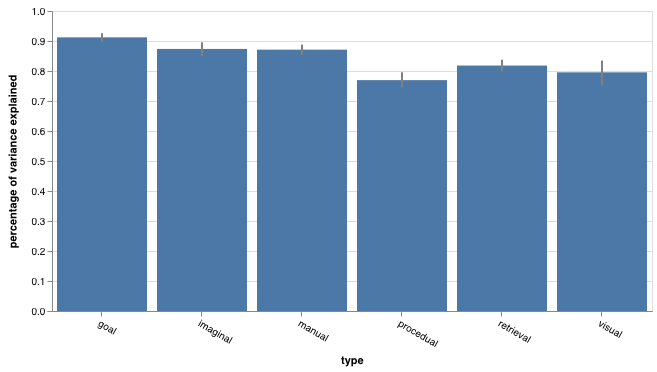

In [130]:
x

In [157]:
df = pd.read_csv("GMM_fit_constraint_all.csv")

In [158]:
df = df.melt(value_vars=df.columns, value_name="number_of_components", var_name="type")

In [159]:
bars = alt.Chart(df, width=600, height=300).mark_point(color='black').encode(
    x='type',
    y='number_of_components'
)

In [160]:
reddy = alt.Chart(df, width=600, height=300).mark_point(color='red').encode(
    x='type',
    y='mean(number_of_components)'
)

In [161]:
reddy_line = alt.Chart(df, width=600, height=300).mark_line(color='red').encode(
    x='type',
    y=alt.Y('mean(number_of_components)', title='Best Number of Components')
)

In [162]:
errors = alt.Chart(df, width=600, height=300).mark_rule(color='red', strokeWidth=5, opacity=0.5).encode(
    x='type',
    y=alt.Y('ci0(number_of_components):Q', title='Best Number of Components'),
    y2='ci1(number_of_components):Q'
)

In [163]:
x = alt.layer(bars, errors, reddy, reddy_line).configure_axisX(
    labelAngle=30
).properties(title='GMM with Fixed Covariance')

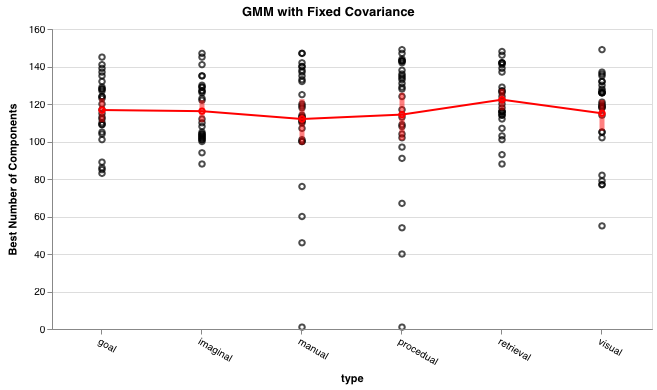

In [164]:
x

In [165]:
x.save('GMM_fit_fixed_cov.png', scale_factor=2.0)